# Part 3. Modeling and Evaluation I

## Import basic libraries and load data

This section import the basic python libraries for usage as well as loading the dataset from the previous notebook.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
data_df = pd.read_csv('./datasets/merge_data_with_amenities_final_baseyear2014.csv')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210180 entries, 0 to 210179
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     210180 non-null  object 
 1   town                     210180 non-null  object 
 2   flat_type                210180 non-null  object 
 3   block                    210180 non-null  object 
 4   street_name              210180 non-null  object 
 5   storey_range             210180 non-null  object 
 6   floor_area_sqm           210180 non-null  float64
 7   flat_model               210180 non-null  object 
 8   lease_commence_date      210180 non-null  int64  
 9   resale_price             210180 non-null  float64
 10  year                     210180 non-null  int64  
 11  month                    210180 non-null  int64  
 12  longitude                210180 non-null  float64
 13  latitude                 210180 non-null  float64
 14  near

In [5]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210180 entries, 0 to 210179
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     210180 non-null  datetime64[ns]
 1   town                     210180 non-null  object        
 2   flat_type                210180 non-null  object        
 3   block                    210180 non-null  object        
 4   street_name              210180 non-null  object        
 5   storey_range             210180 non-null  object        
 6   floor_area_sqm           210180 non-null  float64       
 7   flat_model               210180 non-null  object        
 8   lease_commence_date      210180 non-null  int64         
 9   resale_price             210180 non-null  float64       
 10  year                     210180 non-null  int64         
 11  month                    210180 non-null  int64         
 12  longitude       

In [7]:
data_df.isna().sum()

date                       0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
year                       0
month                      0
longitude                  0
latitude                   0
nearest_dist_to_mrt        0
nearest_mrt                0
nearest_dist_to_pri_sch    0
nearest_pri_sch            0
nearest_dist_to_sec_sch    0
nearest_sec_sch            0
age                        0
avg_floor                  0
inflated_rate              0
inflated_resale_price      0
dtype: int64

## Modeling and Evalution
This section implements 3 regression models namely Linear Regression, Ridge and Lasso Regression to predict the resale price in 2014 given a number of features/characteristics. The features used to model were given in the assignment which were the flat age, flat type and the town. At the end of this section, one of the models will be chosen for the prediction of the resale price.

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV #, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score #, GridSearchCV
from sklearn import metrics

In [9]:
# cont_vars = ['floor_area_sqm', 'nearest_dist_to_mrt', 'nearest_dist_to_pri_sch', \
#              'nearest_dist_to_sec_sch', 'age', 'avg_floor']
# nom_vars = ['town', 'flat_type', 'flat_model']
cont_vars = ['age']
nom_vars = ['town', 'flat_type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, cont_vars),
        ("cat", categorical_transformer, nom_vars),
    ], remainder='passthrough'
)

In [10]:
X = data_df[cont_vars + nom_vars]
y = data_df['inflated_resale_price']

In [11]:
X.head()

,age,town,flat_type
0,26,ANG MO KIO,2 ROOM
1,32,ANG MO KIO,2 ROOM
2,32,ANG MO KIO,3 ROOM
3,28,ANG MO KIO,3 ROOM
4,32,ANG MO KIO,3 ROOM


In [12]:
y[:5]

0    234899.33
1    248993.29
2    295973.15
3    300671.14
4    301610.74
Name: inflated_resale_price, dtype: float64

In [13]:
X.shape, y.shape

((210180, 3), (210180,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# time taken is 1 sec
import time
start = time.time()
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)


lr.fit(X_train, y_train)
end = time.time()
lr_fit_time = end - start
print('Time taken is %.2f seconds' % lr_fit_time)

Time taken is 0.52 seconds


In [16]:
# time taken is 2 sec
start = time.time()
# cross validation with k-folds=5 for the lr model
# using mean sq error as the metrics
cross_val_score(
            lr,
            X_train,
            y_train,
            cv=5,
            scoring='neg_mean_squared_error'
).mean()
end = time.time()
print('Time taken is %.2f seconds.' % (end-start))

Time taken is 1.81 seconds.


In [17]:
# get the coefficient
lr_coe_list = lr['classifier'].coef_
lr_coe_list

array([ -60099.25269052,   33892.47429407,    5689.56094724,
        115040.03844153,  -52623.56886858,  123283.69169144,
       -111923.43100347,  213055.91405678,  189290.25050587,
       -139287.26038026,   68206.2032143 ,   40053.61191775,
        -55048.63982346,  -30319.8632251 , -108159.81578119,
         79889.1867612 ,  163034.20485   ,  -73017.77899681,
       -123005.93690811,  134031.90826896, -181934.89316783,
       -131196.66708396,   10854.78799829,  -20465.69213735,
         72818.08796511, -134733.96277135,  -87422.41076536,
       -318107.86435606, -226981.26578872, -118484.47027457,
         -3984.36701518,   93791.6231676 ,  217274.09858267,
        356492.24568458])

In [18]:
lr['classifier'].intercept_

483134.09589991934

In [19]:
lr['preprocessor'].transformers_[0][2]

['age']

In [20]:
lr['preprocessor'].transformers_[1][1].get_feature_names_out(nom_vars)

array(['town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN',
       'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION'], dtype=object)

In [21]:
# get features list
features_list = lr['preprocessor'].transformers_[0][2] \
                + list(lr['preprocessor'].transformers_[1][1].get_feature_names_out(nom_vars))
features_list

['age',
 'town_ANG MO KIO',
 'town_BEDOK',
 'town_BISHAN',
 'town_BUKIT BATOK',
 'town_BUKIT MERAH',
 'town_BUKIT PANJANG',
 'town_BUKIT TIMAH',
 'town_CENTRAL AREA',
 'town_CHOA CHU KANG',
 'town_CLEMENTI',
 'town_GEYLANG',
 'town_HOUGANG',
 'town_JURONG EAST',
 'town_JURONG WEST',
 'town_KALLANG/WHAMPOA',
 'town_MARINE PARADE',
 'town_PASIR RIS',
 'town_PUNGGOL',
 'town_QUEENSTOWN',
 'town_SEMBAWANG',
 'town_SENGKANG',
 'town_SERANGOON',
 'town_TAMPINES',
 'town_TOA PAYOH',
 'town_WOODLANDS',
 'town_YISHUN',
 'flat_type_1 ROOM',
 'flat_type_2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION']

In [22]:
# predict the sale price using the lr model for train set
y_pred_train = lr.predict(X_train)
# predict the sale price using the lr model for train set
lr_rmse_train = metrics.mean_squared_error(y_pred_train, y_train)**0.5
lr_r2_train = lr.score(X_train, y_train)
print("Train RMSE: %.3f" % lr_rmse_train)
print("Train R2 score: %.3f" % lr_r2_train)

Train RMSE: 67476.189
Train R2 score: 0.776


In [23]:
# predict the sale price using the lr model for test set
y_pred_test = lr.predict(X_test)
# predict the sale price using the lr model for ttest set
lr_rmse_test = metrics.mean_squared_error(y_pred_test, y_test)**0.5
lr_r2_test = lr.score(X_test, y_test)
print("Test RMSE: %.3f" % lr_rmse_test)
print("Test R2 score: %.3f" % lr_r2_test)

Test RMSE: 67164.250
Test R2 score: 0.777


In [24]:
# get the coefficient for respecitve features
sorted(zip(lr_coe_list, features_list), reverse=True)

[(356492.2456845817, 'flat_type_MULTI-GENERATION'),
 (217274.09858267242, 'flat_type_EXECUTIVE'),
 (213055.91405678075, 'town_BUKIT TIMAH'),
 (189290.25050586576, 'town_CENTRAL AREA'),
 (163034.20484999812, 'town_MARINE PARADE'),
 (134031.9082689563, 'town_QUEENSTOWN'),
 (123283.69169144362, 'town_BUKIT MERAH'),
 (115040.0384415315, 'town_BISHAN'),
 (93791.62316759542, 'flat_type_5 ROOM'),
 (79889.1867612046, 'town_KALLANG/WHAMPOA'),
 (72818.08796511393, 'town_TOA PAYOH'),
 (68206.20321429912, 'town_CLEMENTI'),
 (40053.61191775415, 'town_GEYLANG'),
 (33892.474294068255, 'town_ANG MO KIO'),
 (10854.787998286485, 'town_SERANGOON'),
 (5689.560947243071, 'town_BEDOK'),
 (-3984.3670151759525, 'flat_type_4 ROOM'),
 (-20465.69213734792, 'town_TAMPINES'),
 (-30319.86322509725, 'town_JURONG EAST'),
 (-52623.568868582064, 'town_BUKIT BATOK'),
 (-55048.63982345896, 'town_HOUGANG'),
 (-60099.252690521396, 'age'),
 (-73017.77899681461, 'town_PASIR RIS'),
 (-87422.41076535729, 'town_YISHUN'),
 (-108

In [25]:
# check for top and btm 10 features that influence the sale price
top_btm_10_features = sorted(zip(lr_coe_list, features_list), reverse=True)[0:10] \
                        + sorted(zip(lr_coe_list, features_list), reverse=True)[-10:]

In [26]:
top_btm_10_features

[(356492.2456845817, 'flat_type_MULTI-GENERATION'),
 (217274.09858267242, 'flat_type_EXECUTIVE'),
 (213055.91405678075, 'town_BUKIT TIMAH'),
 (189290.25050586576, 'town_CENTRAL AREA'),
 (163034.20484999812, 'town_MARINE PARADE'),
 (134031.9082689563, 'town_QUEENSTOWN'),
 (123283.69169144362, 'town_BUKIT MERAH'),
 (115040.0384415315, 'town_BISHAN'),
 (93791.62316759542, 'flat_type_5 ROOM'),
 (79889.1867612046, 'town_KALLANG/WHAMPOA'),
 (-108159.81578118677, 'town_JURONG WEST'),
 (-111923.43100346536, 'town_BUKIT PANJANG'),
 (-118484.47027457021, 'flat_type_3 ROOM'),
 (-123005.93690811438, 'town_PUNGGOL'),
 (-131196.6670839563, 'town_SENGKANG'),
 (-134733.96277135066, 'town_WOODLANDS'),
 (-139287.2603802619, 'town_CHOA CHU KANG'),
 (-181934.89316782533, 'town_SEMBAWANG'),
 (-226981.265788721, 'flat_type_2 ROOM'),
 (-318107.8643560592, 'flat_type_1 ROOM')]

In [27]:
def create_barplot(features_list):
    x_value =[]
    y_value = []
    for feature in features_list:
        x_value.append(feature[0])
        y_value.append(feature[1])
    
    plt.figure(figsize=(10, 10))
    bp = sns.barplot(
                # y to specify list of category
                y=y_value, 
                # x to specify the data to the list of category
                x=x_value,
     
        )

    bp.set_xlabel('Coefficient', fontdict={'fontsize':12, 'fontweight': 'bold'})
    bp.set_ylabel('Features', fontdict={'fontsize':12, 'fontweight': 'bold'})
    bp.set_title('Features Importance', fontdict={'fontsize':16, 'fontweight': 'bold'})

    
    plt.show()

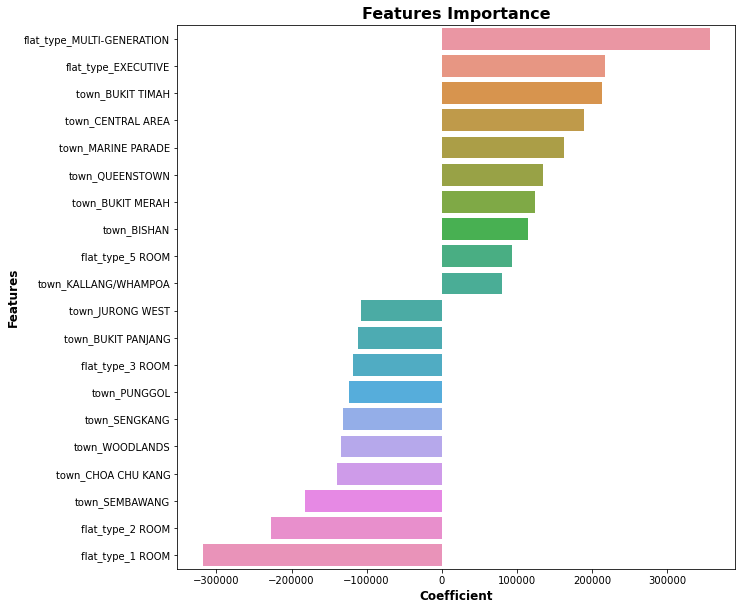

In [28]:
create_barplot(top_btm_10_features)

In [29]:
data_df['flat_model'].unique()

array(['Improved', 'New Generation', 'Standard', 'Model A', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Model A-Maisonette',
       'Apartment', 'Adjoined flat', 'Multi Generation', 'Model A2',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', 'DBSS',
       'Type S1', 'Type S2', 'Premium Apartment Loft', '2-room'],
      dtype=object)

In [30]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 10, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
                    alphas=r_alphas,
                    cv=5,
                    scoring='neg_mean_squared_error'
                )

In [31]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
ridge = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", ridge_cv)]
)

In [32]:
# time taken is 41 sec
start = time.time()
# Fit model using best ridge alpha!
ridge.fit(X_train, y_train)
end = time.time()
ridge_fit_time = end - start
print('Time taken is %.2f seconds' % ridge_fit_time)

Time taken is 40.47 seconds


In [33]:
# time taken is 161 sec
start = time.time()
# cross validation with k-folds=5 for the ridge model
# using mean sq error as the metrics
cross_val_score(
            ridge,
            X_train,
            y_train,
            cv=5,
            scoring='neg_mean_squared_error'
).mean()
end = time.time()
print('Time taken is %.2f seconds.' % (end-start))

Time taken is 160.59 seconds.


In [34]:
ridge['classifier'].alpha_

1.0

In [35]:
# get the coefficient
ridge_coe = ridge['classifier'].coef_
ridge_coe

array([ -60054.17311027,   33962.14475321,    5725.6270707 ,
        115478.70759333,  -52630.60394118,  123537.18081977,
       -111950.10877436,  212525.07067996,  189242.33697739,
       -139013.00386231,   68070.19747385,   39948.36869179,
        -55089.00216   ,  -30523.48814541, -107731.07904841,
         79797.93879631,  162809.67908285,  -73168.30422092,
       -122837.32169111,  134144.1186825 , -181791.93840767,
       -131084.05157646,   10696.46313942,  -20401.11085381,
         72547.16488978, -134919.22403611,  -87345.7619329 ,
       -321985.85921206, -223212.65728078, -115068.76170816,
          -558.87152238,   97206.32735047,  220714.36750352,
        342905.45489019])

In [36]:
ridge['classifier'].intercept_

479667.4538387833

In [37]:
# predict the sale price using the ridge model for train set
y_pred_train_ridge = ridge.predict(X_train)
# predict the sale price using the ridge model for train set
ridge_rmse_train = metrics.mean_squared_error(y_pred_train_ridge, y_train)**0.5
ridge_r2_train = ridge.score(X_train, y_train)
print("Train RMSE: %.3f" % ridge_rmse_train)
print("Train R2 score: %.3f" % ridge_r2_train)

Train RMSE: 67477.486
Train R2 score: 0.776


In [38]:
# predict the sale price using the ridge model  for test set
y_pred_test_ridge = ridge.predict(X_test)
# predict the sale price using the ridge model for test set
ridge_rmse_test = metrics.mean_squared_error(y_pred_test_ridge, y_test)**0.5
ridge_r2_test = ridge.score(X_test, y_test)
print("Test RMSE: %.3f" % ridge_rmse_test)
print("Test R2 score: %.3f" % ridge_r2_test)

Test RMSE: 67160.808
Test R2 score: 0.778


In [39]:
# check for top and btm 10 features that influence the sale price
ridge_top_btm_10_features = sorted(zip(ridge_coe, features_list), reverse=True)[0:10] \
                            + sorted(zip(ridge_coe, features_list), reverse=True)[-10:]

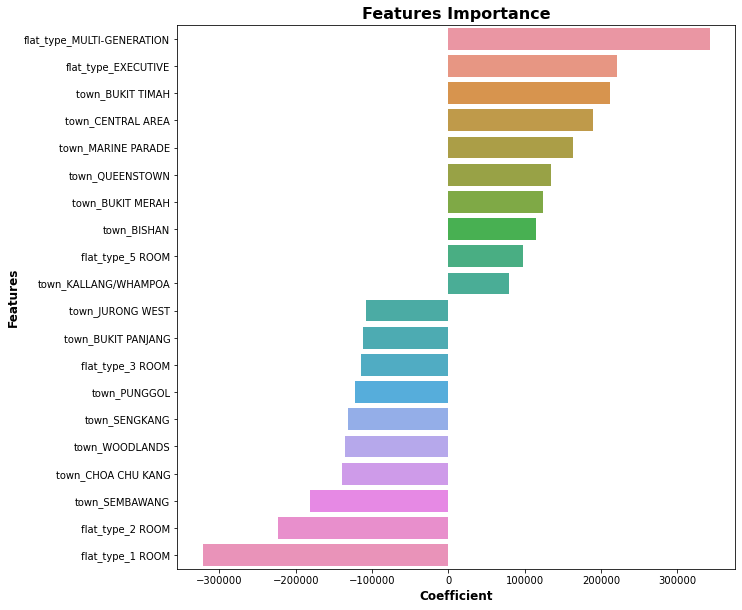

In [40]:
create_barplot(ridge_top_btm_10_features)

In [41]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 10, 100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(
#             alphas=l_alphas,
            n_alphas=500,
            cv=5,
            #scoring='neg_mean_squared_error', # cannot choose scoring, only can pick MSE
            max_iter=50000
        )

In [42]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", lasso_cv)]
)

In [43]:
# takes 123 seconds
start = time.time()
# Fit model using best lasso alpha!
lasso.fit(X_train, y_train)
end = time.time()
lasso_fit_time = end - start
print('Time taken is %.2f seconds.' % lasso_fit_time)

Time taken is 122.53 seconds.


In [44]:
# time taken is 510 sec
start = time.time()
# cross validation with k-folds=5 for the lasso model
# using mean sq error as the metrics
cross_val_score(
            lasso,
            X_train,
            y_train,
            cv=5,
            scoring='neg_mean_squared_error'
).mean()
end = time.time()
print('Time taken is %.2f seconds.' % (end-start))

Time taken is 509.14 seconds.


In [45]:
lasso['classifier'].alpha_

50.707080163989524

In [46]:
# get the coefficient
lasso_coe = ridge['classifier'].coef_
lasso_coe

array([ -60054.17311027,   33962.14475321,    5725.6270707 ,
        115478.70759333,  -52630.60394118,  123537.18081977,
       -111950.10877436,  212525.07067996,  189242.33697739,
       -139013.00386231,   68070.19747385,   39948.36869179,
        -55089.00216   ,  -30523.48814541, -107731.07904841,
         79797.93879631,  162809.67908285,  -73168.30422092,
       -122837.32169111,  134144.1186825 , -181791.93840767,
       -131084.05157646,   10696.46313942,  -20401.11085381,
         72547.16488978, -134919.22403611,  -87345.7619329 ,
       -321985.85921206, -223212.65728078, -115068.76170816,
          -558.87152238,   97206.32735047,  220714.36750352,
        342905.45489019])

In [47]:
lasso['classifier'].intercept_

459531.8286053788

In [48]:
# predict the sale price using the lasso model for train set
y_pred_train_lasso = lasso.predict(X_train)
# predict the sale price using the lasso model for train set
lasso_rmse_train = metrics.mean_squared_error(y_pred_train_lasso, y_train)**0.5
lasso_r2_train = ridge.score(X_train, y_train)
print("Train RMSE: %.3f" % lasso_rmse_train)
print("Train R2 score: %.3f" % lasso_r2_train)

Train RMSE: 67597.058
Train R2 score: 0.776


In [49]:
# predict the sale price using the lasso model for test set
y_pred_test_lasso = lasso.predict(X_test)
# predict the sale price using the lasso model for ttest set
lasso_rmse_test = metrics.mean_squared_error(y_pred_test_lasso, y_test)**0.5
lasso_r2_test = lasso.score(X_test, y_test)
print("Test RMSE: %.3f" % lasso_rmse_test)
print("Test R2 score: %.3f" % lasso_r2_test)

Test RMSE: 67265.667
Test R2 score: 0.777


In [50]:
# check for top and btm 10 features that influence the sale price
lasso_top_btm_10_features = sorted(zip(lasso_coe, features_list), reverse=True)[0:10] \
                            + sorted(zip(lasso_coe, features_list), reverse=True)[-10:]

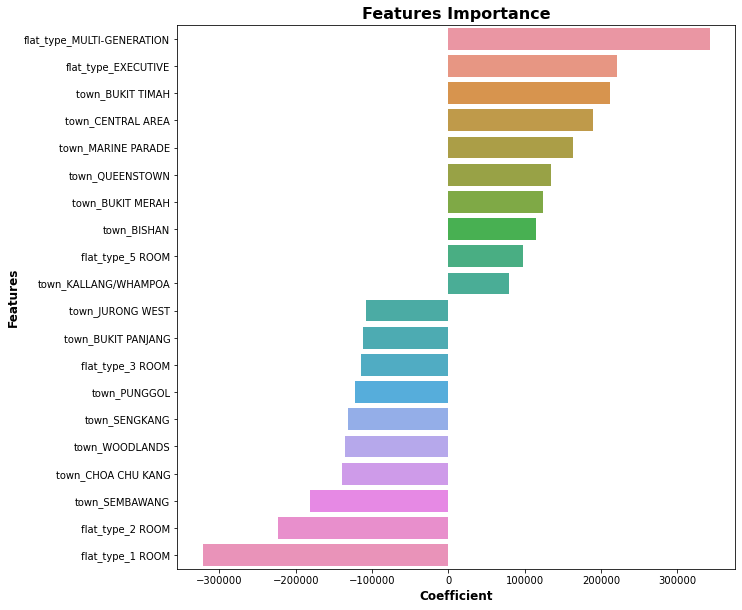

In [51]:
create_barplot(lasso_top_btm_10_features)

In [52]:
column_list = ['Model', 'Train RSME', 'Train R2', 'Test RSME', 'Test R2', 'Fit Time (sec)']
lr_data = ['Linear Regression', round(lr_rmse_train, 3), round(lr_r2_train, 3), round(lr_rmse_test, 3), \
           round(lr_r2_test, 3), round(lr_fit_time, 3)]
ridge_data = ['Ridge Regression', round(ridge_rmse_train, 3), round(ridge_r2_train, 3), round(ridge_rmse_test, 3), \
              round(ridge_r2_test, 3), round(ridge_fit_time, 3)]
lasso_data = ['Lasso Regression', round(lasso_rmse_train, 3), round(lasso_r2_train, 3), round(lasso_rmse_test, 3), \
              round(lasso_r2_test, 3), round(lasso_fit_time, 3)]
data = [lr_data, ridge_data, lasso_data]
model_df = pd.DataFrame(data, columns=column_list)

In [53]:
model_df

,Model,Train RSME,Train R2,Test RSME,Test R2,Fit Time (sec)
0,Linear Regression,67476.189,0.776,67164.250,0.777,0.516
1,Ridge Regression,67477.486,0.776,67160.808,0.778,40.471
2,Lasso Regression,67597.058,0.776,67265.667,0.777,122.527


In [54]:
import pickle
# filename = 'lr_model.sav'
pickle.dump(lr, open('./models/lr_model_2014.sav', 'wb'))
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

### Assessment on the resale price given the features of a HDB flat
Given the following features of HDB sold in 2017:
* Flat type: 4 ROOM
* Town: Yishun
* Flat Model: New Generation
* Storey Range: 10 to 12
* Floor Area (sqm): 91
* Lease Commence Date: 1984
* Resale Price: 550,800

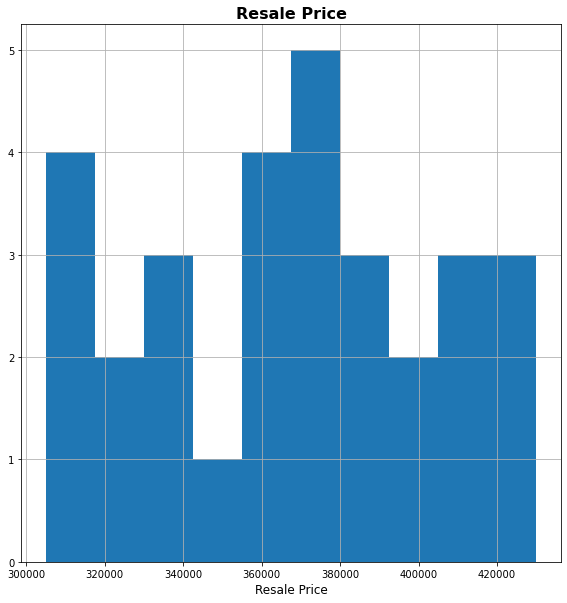

In [55]:
data_df.loc[(data_df['year'] == 2017) & (data_df['flat_type'] == '4 ROOM') & \
            (data_df['town'] == 'YISHUN') & (data_df['floor_area_sqm'] == 91), \
            'resale_price'].hist(figsize=(8,8))
plt.tight_layout()
plt.xlabel('Resale Price', fontdict={'fontsize': 12})
plt.title('Resale Price', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show();

In [56]:
new_data = [[33, 'YISHUN', '4 ROOM']]
cont_vars2 = ['age']
nom_vars2 = ['town', 'flat_type']
X_data = pd.DataFrame(new_data, columns=cont_vars2+nom_vars2)
X_data

,age,town,flat_type
0,33,YISHUN,4 ROOM


In [57]:
price_baseyear_2014 = lr.predict(X_data)
price_baseyear_2014

array([347687.15377097])

In [59]:
inflated_2017 = data_df.loc[data_df['year'] == 2017, 'inflated_rate'].mean()
inflated_2017

1.0243902439029722

In [62]:
price_baseyear_2014/inflated_2017

array([339408.88820482])

### Conclusion

Answer to Question 2A:
The Linear Regression model was chosen for predicting the resale price of HDB flat as it achieve the lowest RSME and it took a less than 1 sec to fit the training dataset compared to the other models. From the feature importance bar plot, we can also see that towns in the Central area like Bukit Timah, Bishan, Bukit Merah and Queenstown as well as flat type like MULTI_GENERATION, EXECUTIVE and 5-ROOM contribute to the high resale price. On the contrary, towns in the West and North-East areas like Sembawang, Choa Chu Kang, Woodlands, Jurong West, Bukit Panjang, Seng Kang and Punggol as well as flat type like 1-ROOM, 2-ROOM and 3-ROOM contribute to a lower resale price.

Answer to Question 2B:
From the historical data that we had, a histogram was plotted using the resale price in 2017 for the given features and it ranged between 300K to 430K. Hence the resale price of 550K is not reasonable in my opinion. The Linear Regression model was used to predict the resale price given the features/characteristics and the predicted price was ~340K taking into consideration the inflation rate.